#1st program and output:

In [ ]:
#Sample Python Program
print("Hello, World!")

#Example of a simple calculation
a = 5
b = 10
sum = a+b
print(f"The sum of {a} and {b} is {sum}")

Hello, World!
The sum of 5 and 10 is 15


##Plotting program(optional):

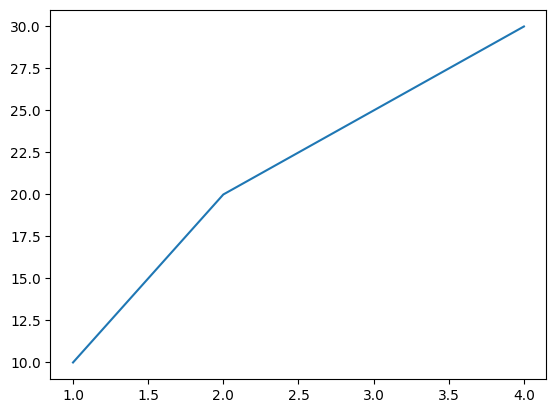

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
plt.plot(x, y)
plt.show()

#2nd Program and output:

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
# Use np.loadtxt with skiprows to skip the header row
dataset = np.loadtxt('//content/pima-indians-diabetes.csv', delimiter=',', skiprows=1)
# Split into input (X) and output (y)
X = dataset[:, 0:8]
y = dataset[:, 8]

# Define the Keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the Keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

# Make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)

# Summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 1 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 1 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


<ipython-input-6-9486c60423d5>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


#3rd program and output:

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.BI2643_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


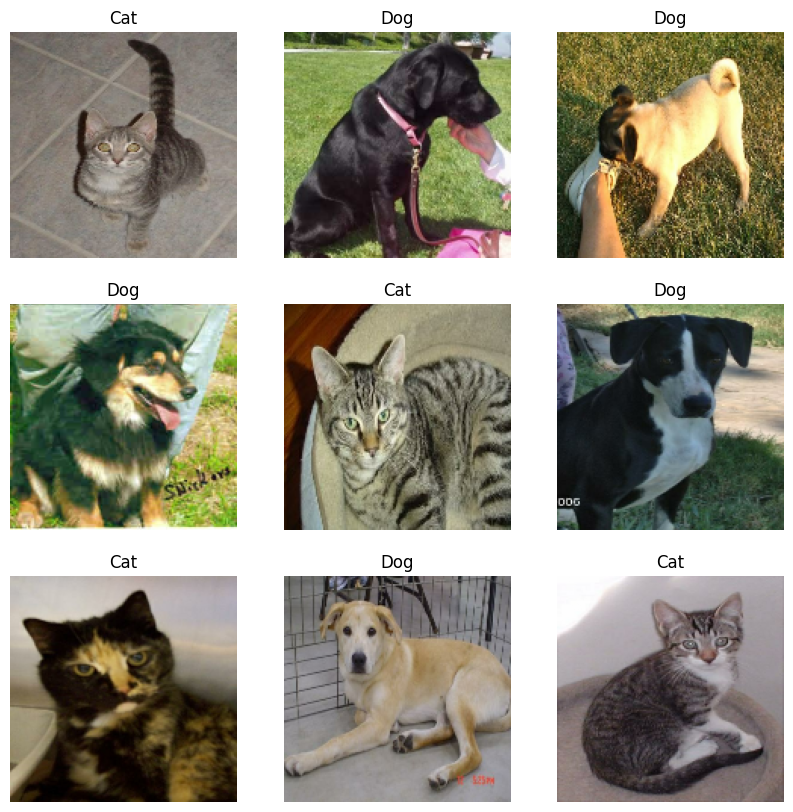

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 66ms/step - accuracy: 0.5771 - loss: 0.6983 - val_accuracy: 0.7192 - val_loss: 0.5510
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 60ms/step - accuracy: 0.7315 - loss: 0.5398 - val_accuracy: 0.7483 - val_loss: 0.4918
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.7975 - loss: 0.4401 - val_accuracy: 0.7882 - val_loss: 0.4551
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 88ms/step - accuracy: 0.8512 - loss: 0.3448 - val_accuracy: 0.7928 - val_loss: 0.4762
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.8942 - loss: 0.2403 - val_accuracy: 0.8013 - val_loss: 0.5081
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 88ms/step - accuracy: 0.9620 - loss: 0.1018 - val_accuracy: 0.7952 - val_loss: 0.6100
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 88ms/step - accuracy: 0.9877 - loss: 0.0411 - val_accuracy: 0.7918 - val_loss: 0.7473
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 59ms/step - accuracy: 0.9896 - loss: 0.0318 -

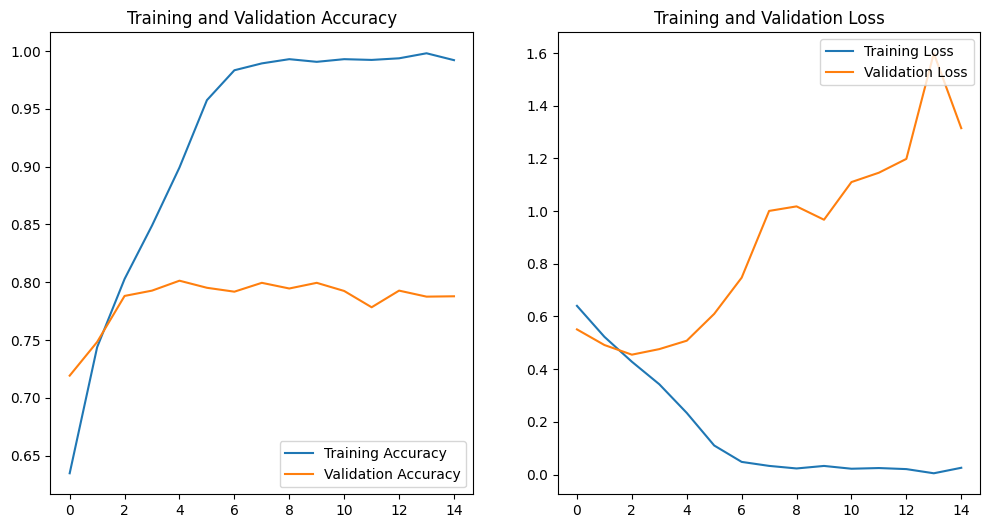

Model training completed and saved as 'cnn_cats_vs_dogs_model.h5'.


In [ ]:

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset
dataset, info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

# Split into training and validation datasets
train_dataset = dataset['train'].take(20000)  # Take the first 20,000 examples
val_dataset = dataset['train'].skip(20000).take(5000)  # Use the next 5,000 for validation

# Preprocess the dataset
IMG_SIZE = 150  # Resize images to 150x150

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize image
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

train_dataset = train_dataset.map(preprocess).batch(32).shuffle(1000)
val_dataset = val_dataset.map(preprocess).batch(32)

# Visualize sample images
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title("Cat" if labels[i] == 0 else "Dog")
        plt.axis("off")
    plt.show()

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset
)

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Save the model
model.save('cnn_cats_vs_dogs_model.h5')
print("Model training completed and saved as 'cnn_cats_vs_dogs_model.h5'.")

#4th program and output:

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras import backend as k

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Input image dimensions
img_rows, img_cols = 28, 28

# Reshape data based on the image data format
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
input_layer = Input(shape=input_shape)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
output_layer = Dense(10, activation='softmax')(layer6)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(
    optimizer='adadelta',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=12, batch_size=500, verbose=1)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]}')
print(f'Accuracy: {score[1]}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.0974 - loss: 2.3973
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 157s 1s/step - accuracy: 0.0976 - loss: 2.3911
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.0985 - loss: 2.3756
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.1003 - loss: 2.3614
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.1062 - loss: 2.3507
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1104 - loss: 2.3380
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.1157 - loss: 2.3278
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.1226 - loss: 2.3165
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.1303 - loss: 2.3097
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1451 - loss: 2.2997
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1580 - los

#5th program and output:

In [3]:

# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Input, Dense, Dropout, Conv1D, GlobalMaxPooling1D, concatenate
from keras.models import Model
from gensim.models import KeyedVectors
from gensim import downloader

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')
# Load dataset
data = pd.read_csv('/content/imdb_labelled.csv', header=None, delimiter=',') # Changed delimiter to ','
data.columns = ['Text', 'Label']# Remove punctuation
def remove_punct(text):
    text_nopunct = re.sub(f"[{string.punctuation}]", '', text)
    return text_nopunct

data['Text_Clean'] = data['Text'].apply(lambda x: remove_punct(x))

# Tokenization and lowercasing
tokens = [word_tokenize(sen) for sen in data['Text_Clean']]
def lower_token(tokens):
    return [w.lower() for w in tokens]

lower_tokens = [lower_token(token) for token in tokens]

# Remove stopwords
stoplist = stopwords.words('english')
def remove_stop_words(tokens):
    return [word for word in tokens if word not in stoplist]

filtered_words = [remove_stop_words(sen) for sen in lower_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

# Add sentiment columns
pos = []
neg = []
for l in data['Label']:
    if l == 1:
        pos.append(1)
        neg.append(0)
    else:
        pos.append(0)
        neg.append(1)

data['Pos'] = pos
data['Neg'] = neg
data = data[['Text_Final', 'tokens', 'Label', 'Pos', 'Neg']]

# Split data
data_train, data_test = train_test_split(data, test_size=0.10, random_state=42)

# Analyze training data
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print(f"{len(all_training_words)} words total, with a vocabulary size of {len(TRAINING_VOCAB)}")
print(f"Max sentence length is {max(training_sentence_lengths)}")

# Analyze test data
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print(f"{len(all_test_words)} words total, with a vocabulary size of {len(TEST_VOCAB)}")
print(f"Max sentence length is {max(test_sentence_lengths)}")

# Load pre-trained Word2Vec
word2vec = downloader.load('word2vec-google-news-300')

# Tokenize and pad data
MAX_SEQUENCE_LENGTH = 300
EMBEDDING_DIM = 300

tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())
train_word_index = tokenizer.word_index

train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

train_embedding_weights = np.zeros((len(train_word_index) + 1, EMBEDDING_DIM))
for word, index in train_word_index.items():
    if word in word2vec:
        train_embedding_weights[index, :] = word2vec[word]
    else:
        train_embedding_weights[index, :] = np.random.rand(EMBEDDING_DIM)

print(train_embedding_weights.shape)

# Define CNN model
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    embedding_layer = Embedding(num_words, embedding_dim, weights=[embeddings],
                                input_length=max_sequence_length, trainable=False)
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2, 3, 4, 5, 6]
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)

    l_merge = concatenate(convs, axis=1)
    x = Dropout(0.1)(l_merge)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    model.summary()
    return model

# Prepare training labels
label_names = ['Pos', 'Neg']
y_train = data_train[label_names].values
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Train CNN model
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index) + 1,
                EMBEDDING_DIM, len(label_names))
num_epochs = 3
batch_size = 32

hist = model.fit(train_cnn_data, y_train, epochs=num_epochs, validation_split=0.1,
                 shuffle=True, batch_size=batch_size)

# Evaluate model
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)
labels = [1, 0]
prediction_labels = [labels[np.argmax(p)] for p in predictions]

accuracy = sum(data_test['Label'] == prediction_labels) / len(prediction_labels)
print(f"Accuracy: {accuracy}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


41 words total, with a vocabulary size of 39
Max sentence length is 6
5 words total, with a vocabulary size of 5
Max sentence length is 4
(40, 300)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 300, 300)       │         12,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 299, 200)       │        120,200 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 298, 200)       │        180,200 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 297, 200)       │        240,200 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 296, 200)       │        300,200 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 295, 200)       │        360,200 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_5    │ (None, 200)            │              0 │ conv1d_5[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_6    │ (None, 200)            │              0 │ conv1d_6[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_7    │ (None, 200)            │              0 │ conv1d_7[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_8    │ (None, 200)            │              0 │ conv1d_8[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_9    │ (None, 200)            │              0 │ conv1d_9[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1000)           │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 1000)           │              0 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)      

 Total params: 1,341,386 (5.12 MB)

 Trainable params: 1,329,386 (5.07 MB)

 Non-trainable params: 12,000 (46.88 KB)

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - acc: 0.0000e+00 - loss: 0.9751 - val_acc: 1.0000 - val_loss: 0.5057
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - acc: 1.0000 - loss: 0.3309 - val_acc: 1.0000 - val_loss: 0.2965
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - acc: 1.0000 - loss: 0.1715 - val_acc: 1.0000 - val_loss: 0.1749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Accuracy: 0.0


#6th program and output:

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset Shape: (6, 2)
                                              review sentiment
0  I loved this movie. It was fantastic, full of ...  positive
1  The film was a waste of time. Poor acting and ...  negative
2  An amazing experience, great cinematography, a...  positive
3  Terrible! One of the worst movies I've ever se...  negative
4  Simply brilliant. It kept me on the edge of my...  positive
5  Not my kind of movie. The pacing was too slow,...  negative
sentiment
positive    3
negative    3
Name: count, dtype: int64
Train Shape: (4,) (4,)
Test Shape: (2,) (2,)
BOW Shape (Train): (4, 1)
BOW Shape (Test): (2, 1)
TFIDF Shape (Train): (4, 126)
TFIDF Shape (Test): (2, 126)
Logistic Regression BOW Accuracy: 0.5
Logistic Regression TFIDF Accuracy: 0.5
Classification Report for Logistic Regression (BOW):
              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       0.00      0.00      0.00         1

    accuracy           

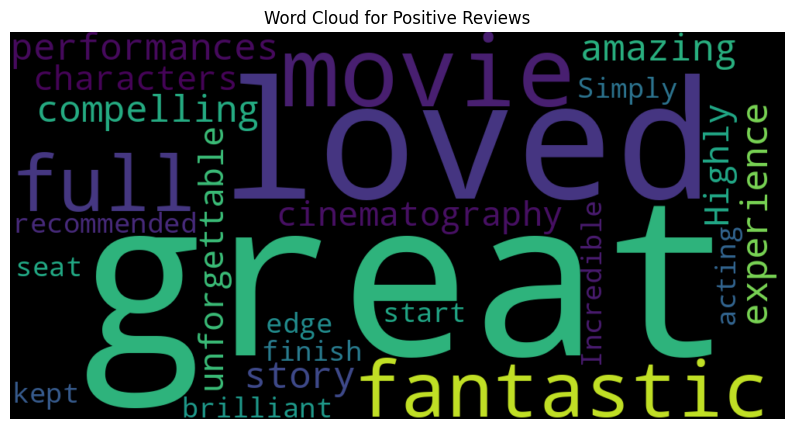

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load the dataset
imdb_data = pd.read_csv('//content/IMDB Dataset.csv')
print("Dataset Shape:", imdb_data.shape)
print(imdb_data.head(10))

# Sentiment count
print(imdb_data['sentiment'].value_counts())

# Split the dataset
# Use the actual length of the dataset for splitting
train_reviews = imdb_data.review[:int(len(imdb_data) * 0.8)]  # 80% for training
train_sentiments = imdb_data.sentiment[:int(len(imdb_data) * 0.8)]
test_reviews = imdb_data.review[int(len(imdb_data) * 0.8):]  # Remaining 20% for testing
test_sentiments = imdb_data.sentiment[int(len(imdb_data) * 0.8):]
print("Train Shape:", train_reviews.shape, train_sentiments.shape)
print("Test Shape:", test_reviews.shape, test_sentiments.shape)

# Preprocessing Functions
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub(r'\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_stopwords(text):
    stopword_list = set(stopwords.words('english'))
    words = text.split()
    return ' '.join([word for word in words if word.lower() not in stopword_list])

# Apply preprocessing
imdb_data['review'] = imdb_data['review'].apply(denoise_text)
imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)
imdb_data['review'] = imdb_data['review'].apply(remove_stopwords)

# Vectorization
cv = CountVectorizer(min_df=1.0, max_df=1.0, binary=False, ngram_range=(1, 3))  # Change min_df to 1 or a float between 0.0 and 1.0
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, use_idf=True, ngram_range=(1, 3))

cv_train_reviews = cv.fit_transform(train_reviews)
cv_test_reviews = cv.transform(test_reviews)
tv_train_reviews = tv.fit_transform(train_reviews)
tv_test_reviews = tv.transform(test_reviews)
print("BOW Shape (Train):", cv_train_reviews.shape)
print("BOW Shape (Test):", cv_test_reviews.shape)
print("TFIDF Shape (Train):", tv_train_reviews.shape)
print("TFIDF Shape (Test):", tv_test_reviews.shape)

# Label Encoding
lb = LabelBinarizer()
train_sentiments = lb.fit_transform(train_sentiments)
test_sentiments = lb.transform(test_sentiments)

# Logistic Regression
lr = LogisticRegression(max_iter=500, random_state=42)

# BOW
lr_bow = lr.fit(cv_train_reviews, train_sentiments)
lr_bow_predict = lr.predict(cv_test_reviews)
lr_bow_score = accuracy_score(test_sentiments, lr_bow_predict)
print("Logistic Regression BOW Accuracy:", lr_bow_score)

# TFIDF
lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
lr_tfidf_predict = lr.predict(tv_test_reviews)
lr_tfidf_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("Logistic Regression TFIDF Accuracy:", lr_tfidf_score)

# Classification Reports
print("Classification Report for Logistic Regression (BOW):")
print(classification_report(test_sentiments, lr_bow_predict, target_names=['Negative', 'Positive']))

print("Classification Report for Logistic Regression (TFIDF):")
print(classification_report(test_sentiments, lr_tfidf_predict, target_names=['Negative', 'Positive']))

# Confusion Matrix
print("Confusion Matrix (BOW):")
print(confusion_matrix(test_sentiments, lr_bow_predict))

print("Confusion Matrix (TFIDF):")
print(confusion_matrix(test_sentiments, lr_tfidf_predict))

# Word Cloud for Positive Reviews
plt.figure(figsize=(10, 10))
positive_text = ' '.join(imdb_data.loc[imdb_data['sentiment'] == 'positive', 'review'])
wordcloud = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

#7th program and output :

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3824 - val_loss: 0.1883
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1775 - val_loss: 0.1526
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1487 - val_loss: 0.1337
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1316 - val_loss: 0.1209
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1200 - val_loss: 0.1129
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1123 - val_loss: 0.1072
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1069 - val_loss: 0.1030
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1032 - val_loss: 0.0997
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1004 - val_loss: 0.0975
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0980 - val_loss: 0.0959
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0967 - val_loss: 0.0947
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms

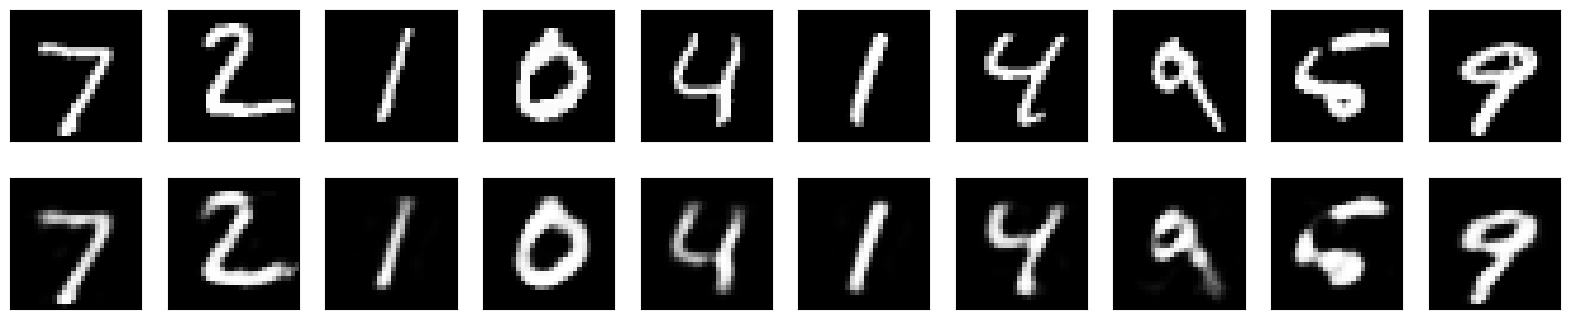

In [ ]:

import keras
from keras import layers
from keras import regularizers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor of 24.5, assuming the input is 784 floats

# This is our input image (28x28 pixels flattened into 784)
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model (decoder layer)
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Display the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

#8th program and output:

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 561kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.94MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.66MB/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



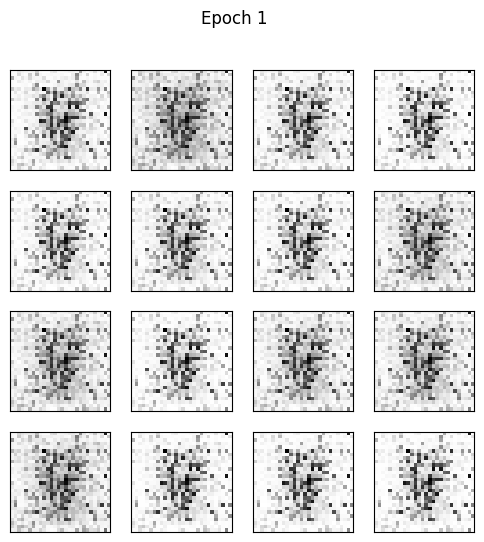

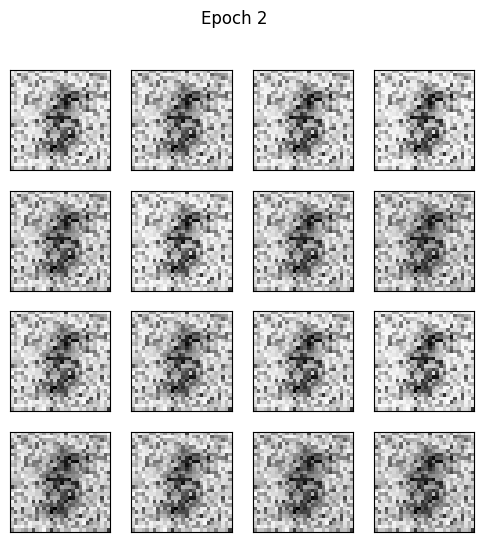

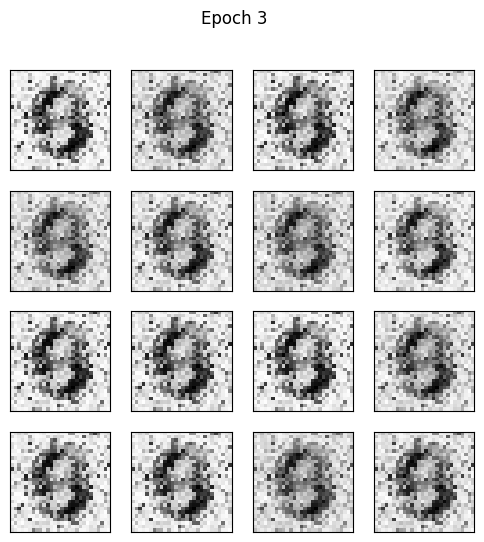

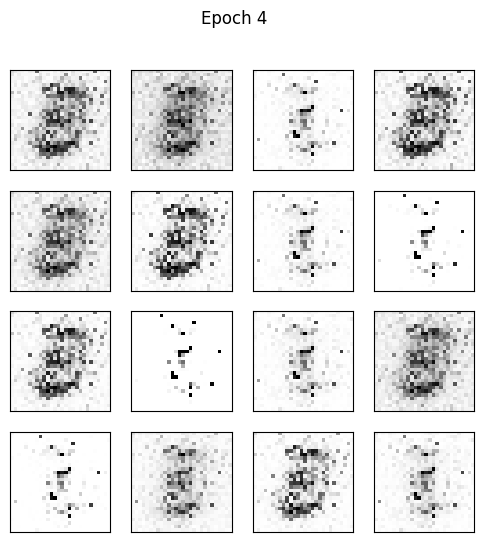

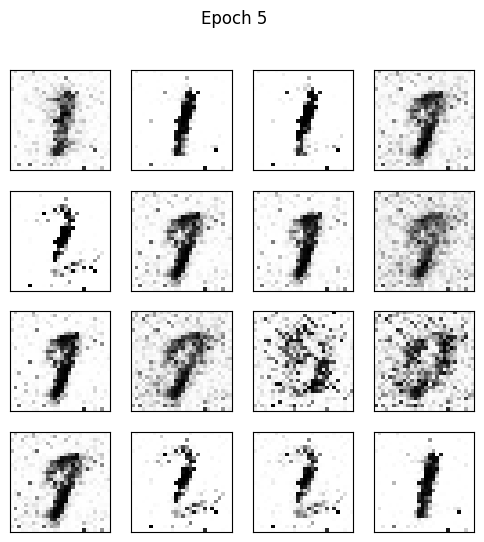

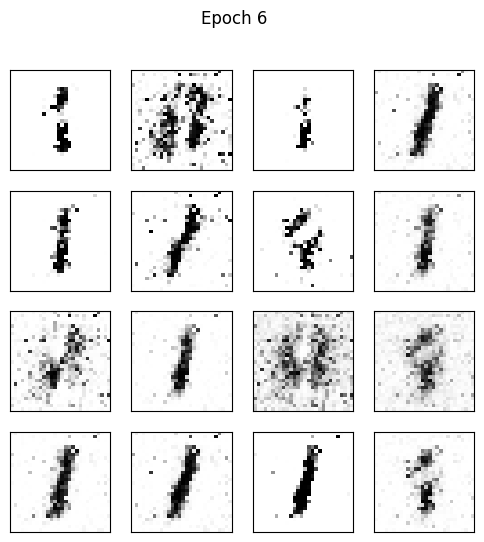

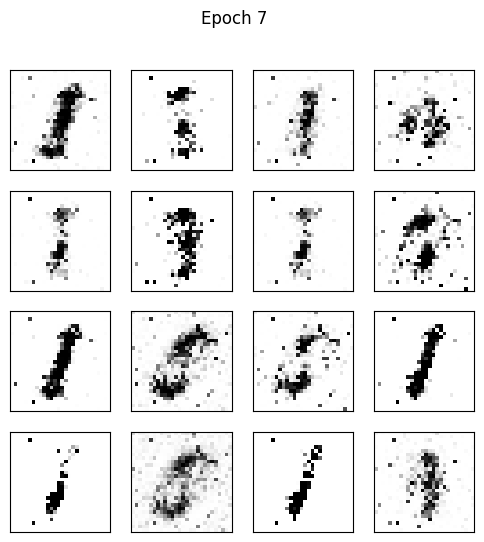

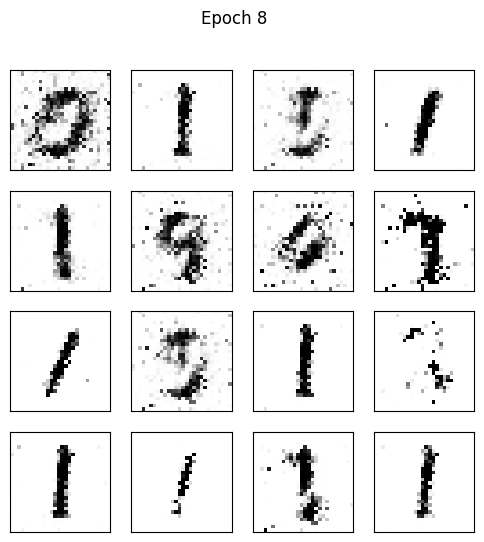

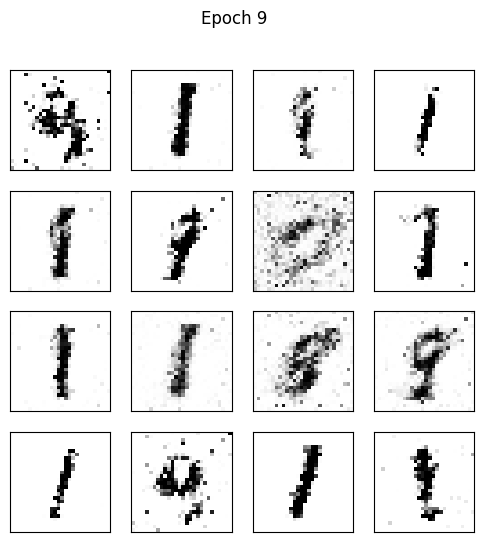

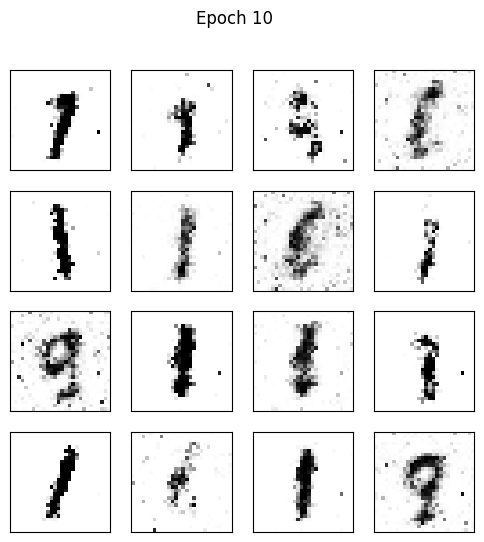

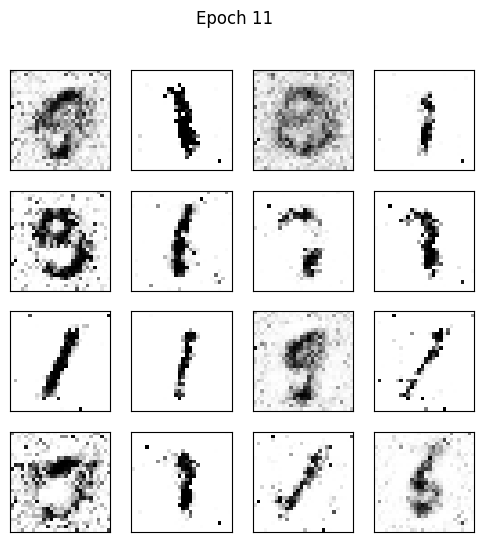

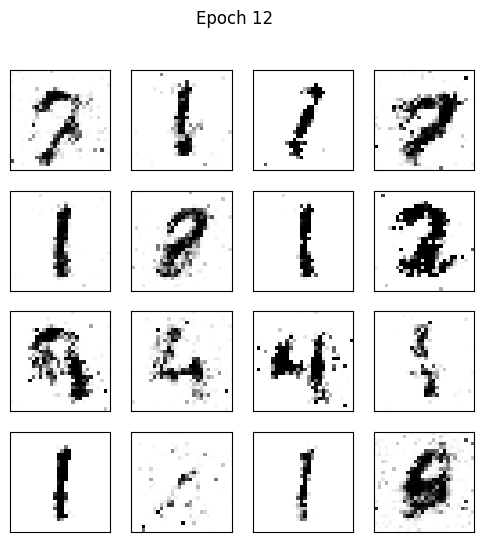

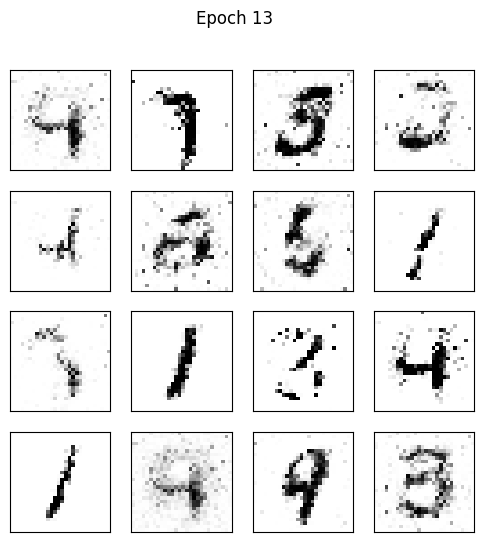

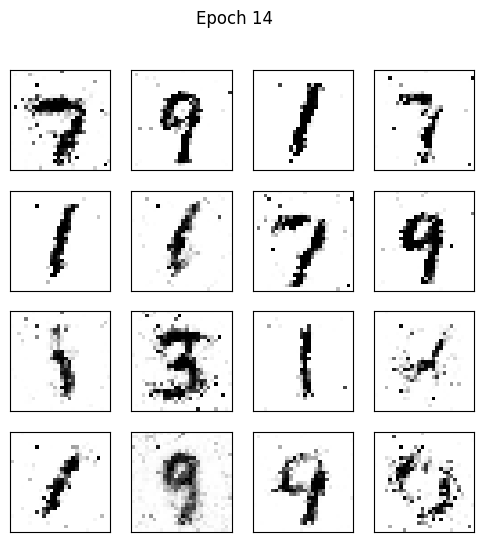

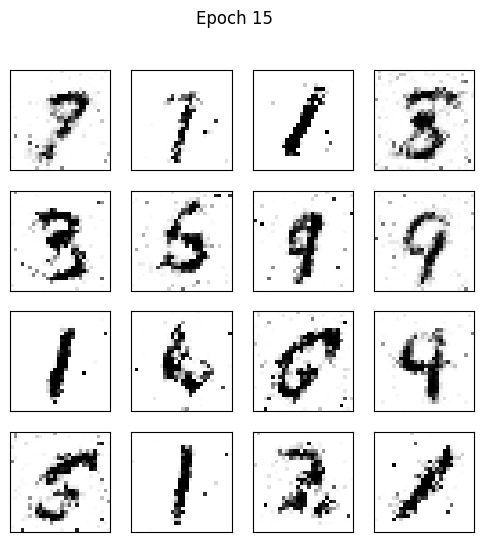

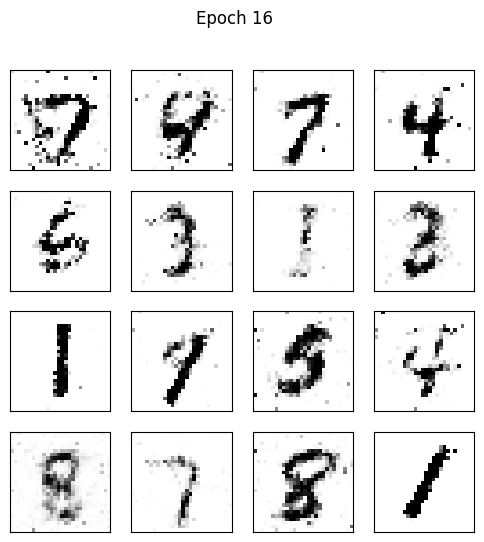

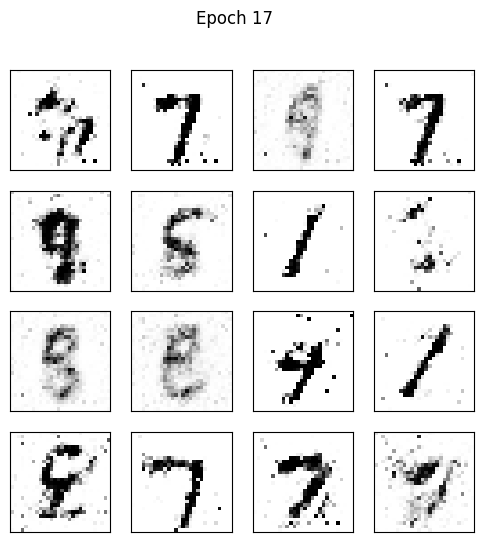

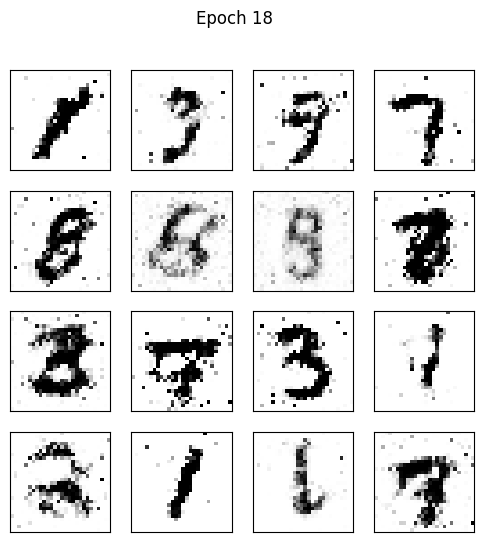

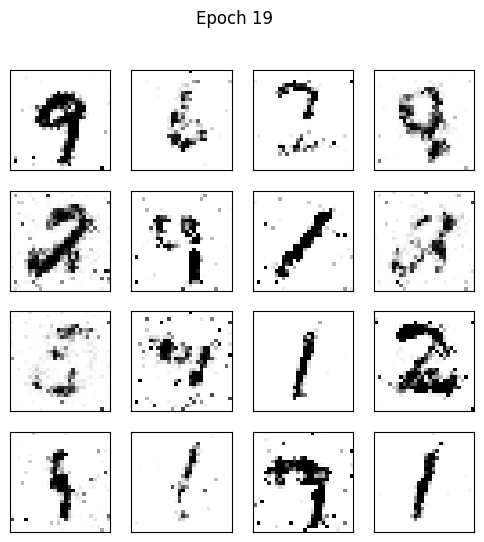

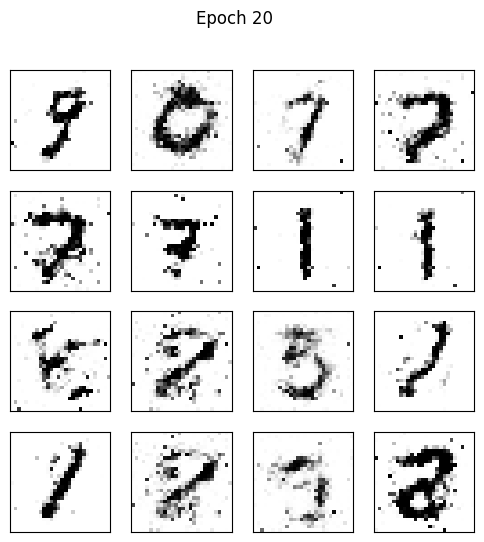

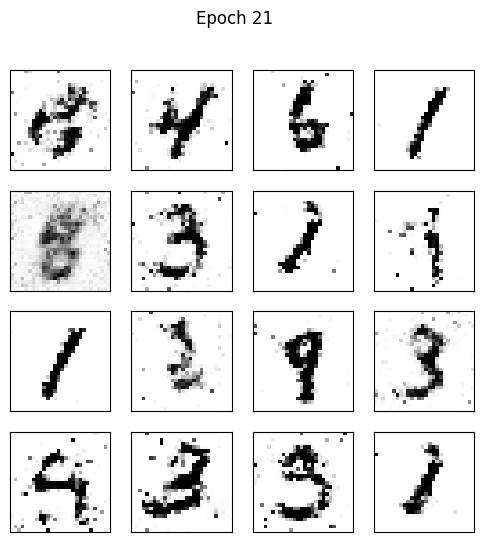

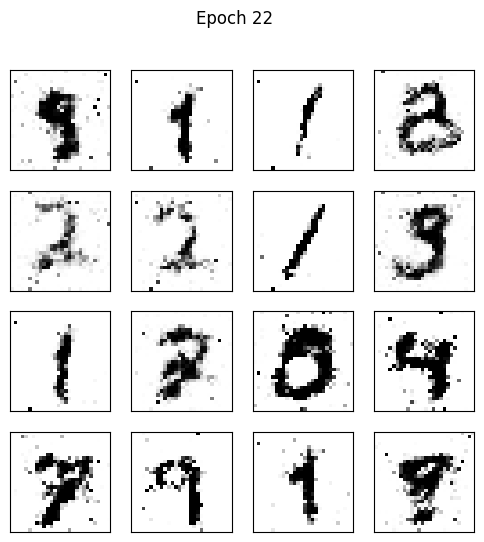

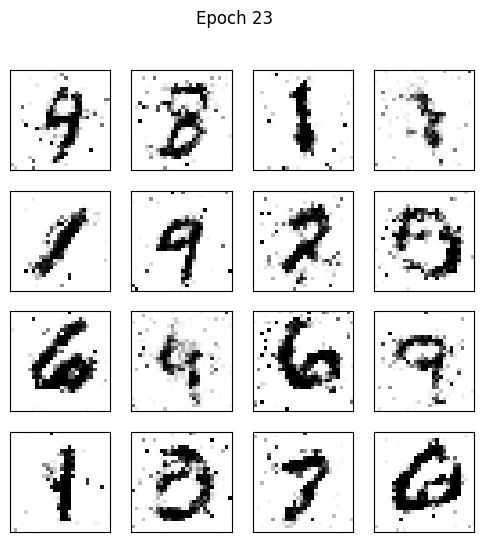

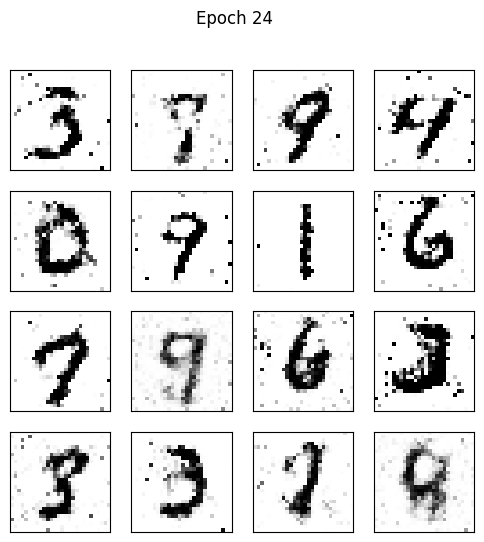

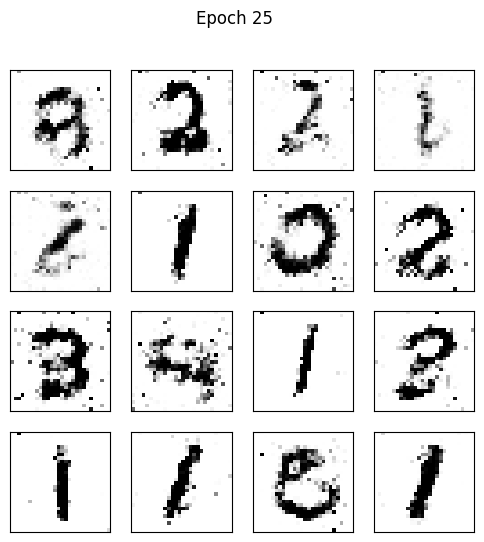

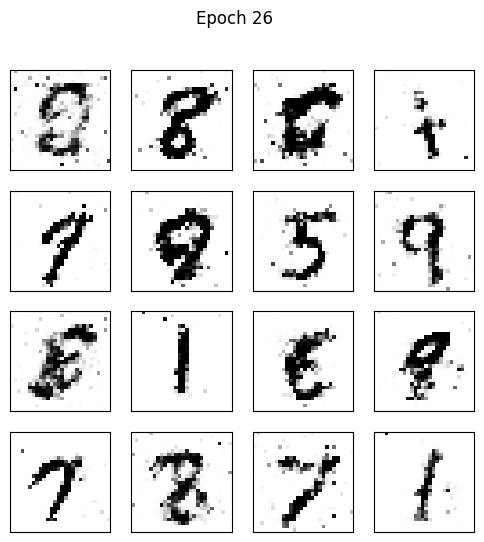

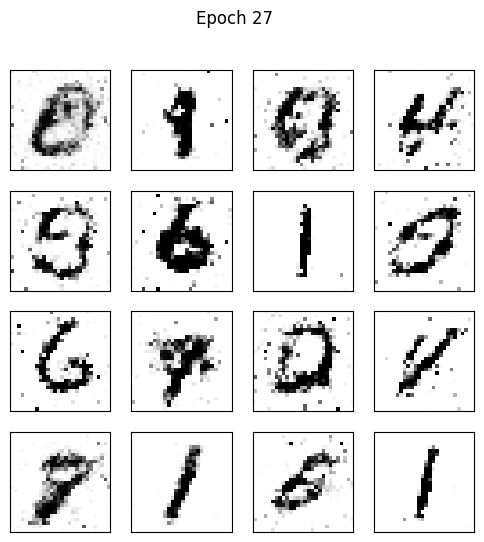

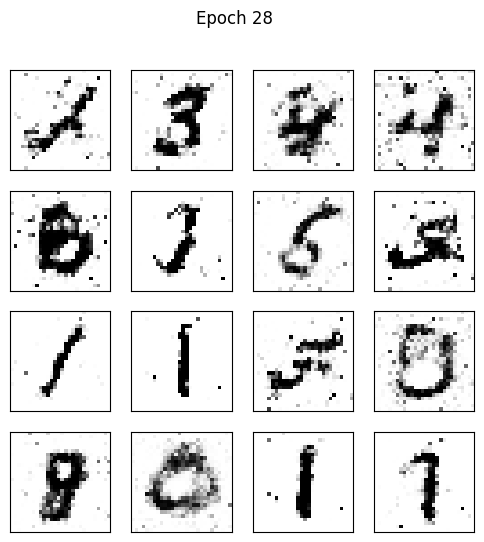

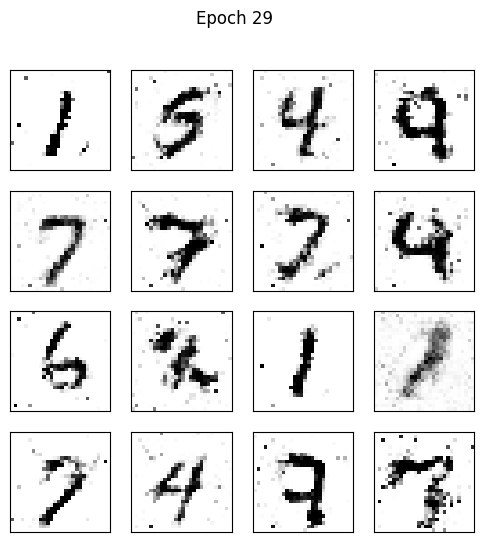

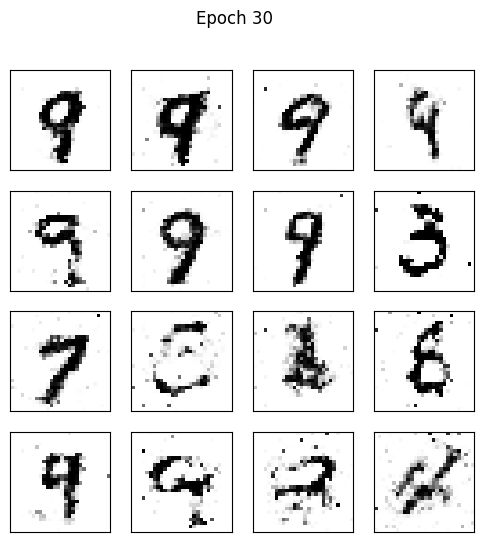

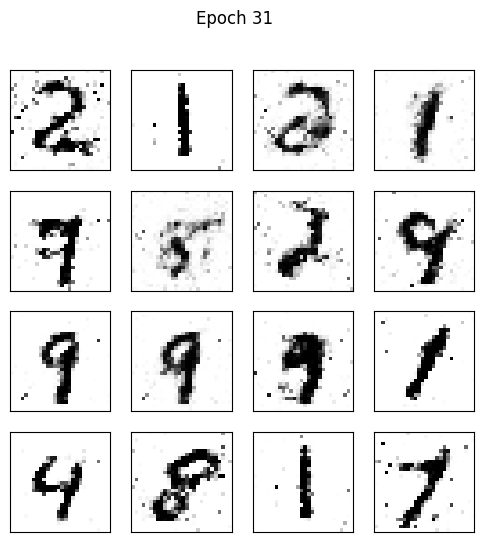

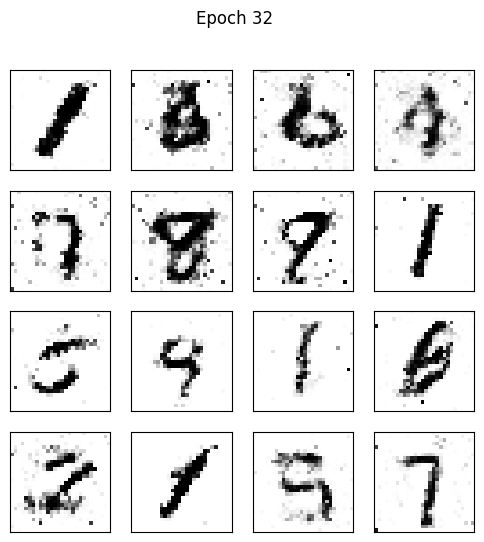

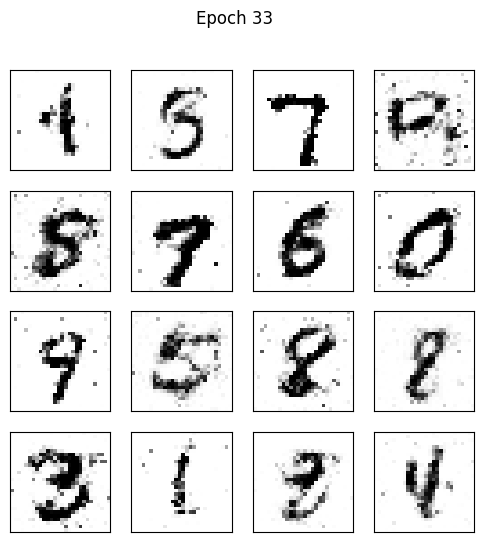

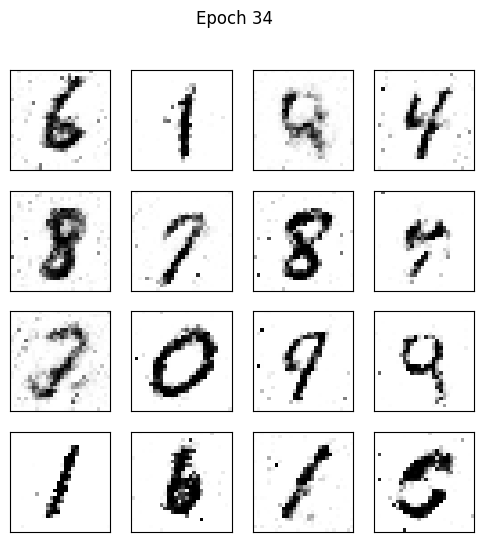

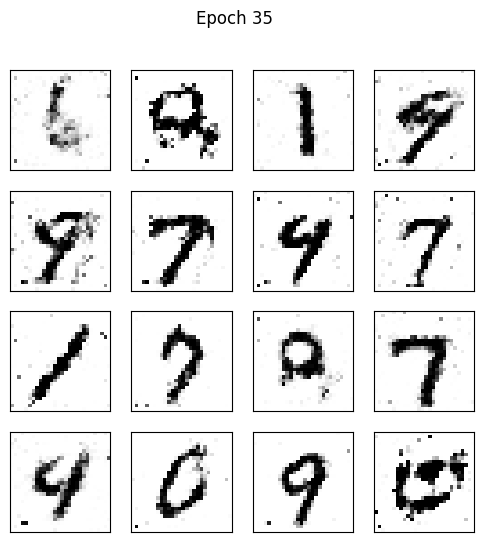

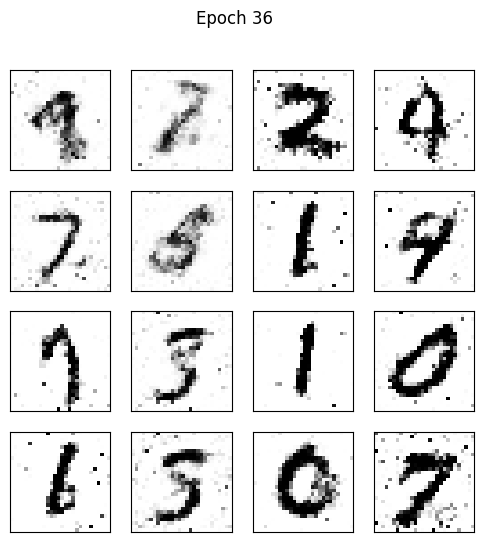

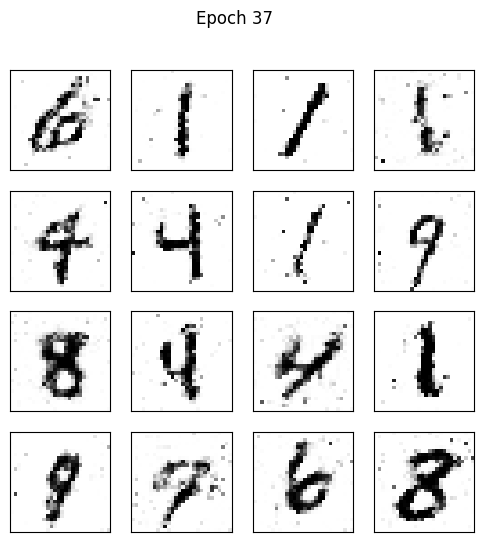

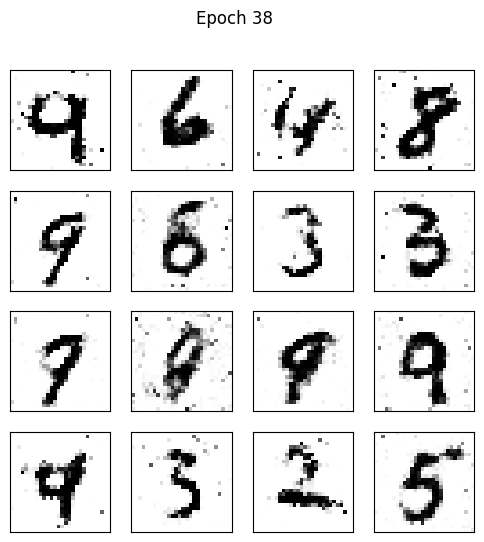

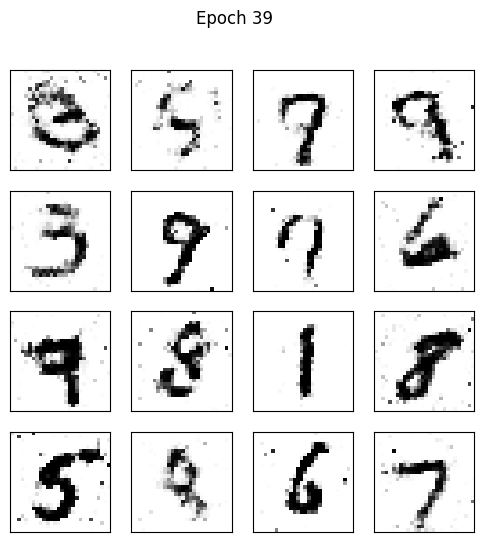

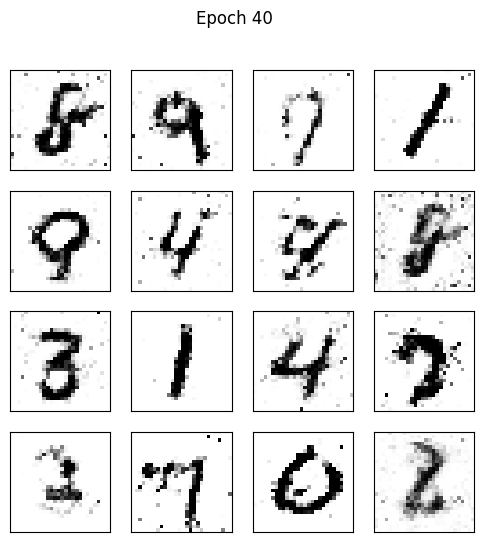

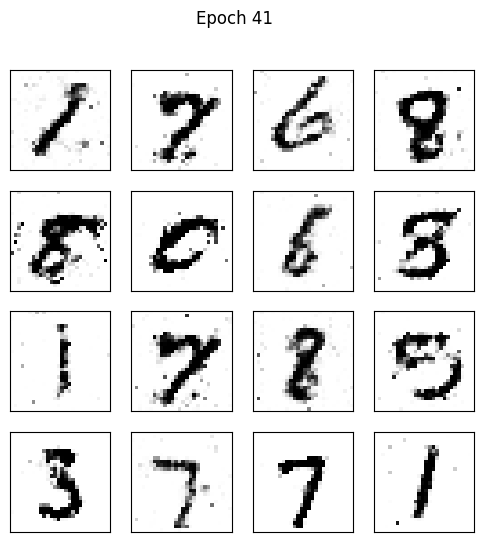

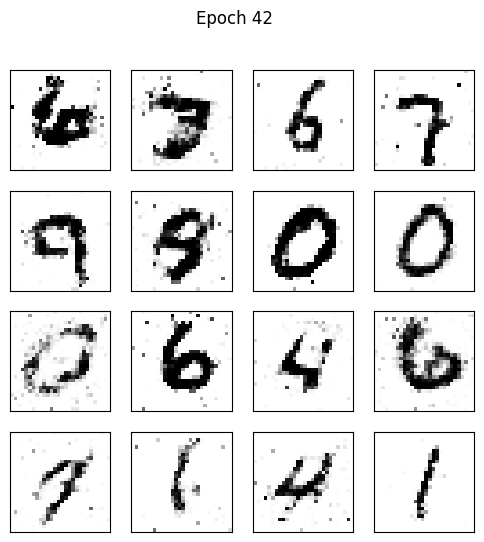

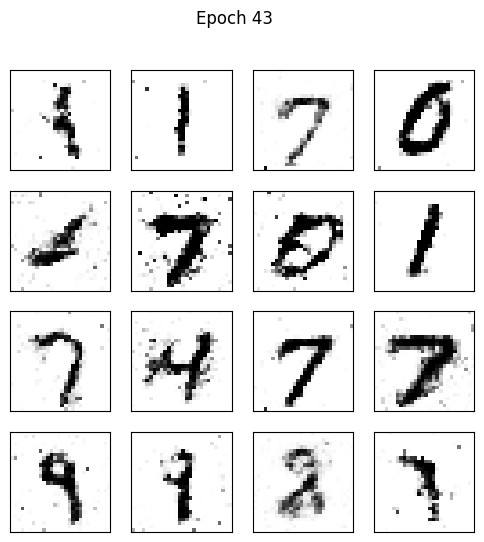

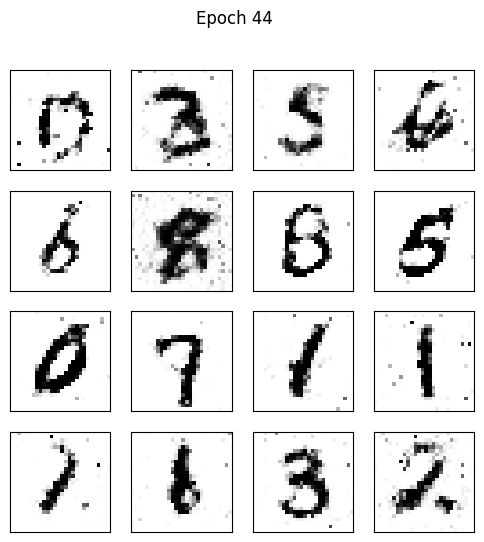

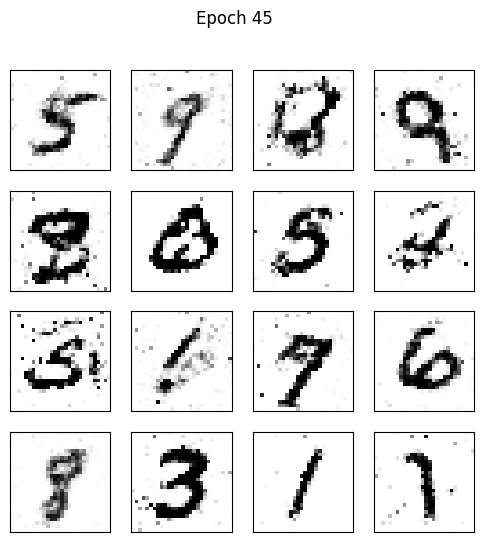

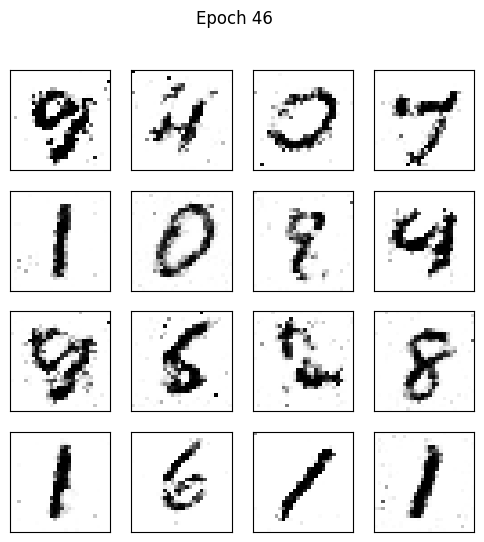

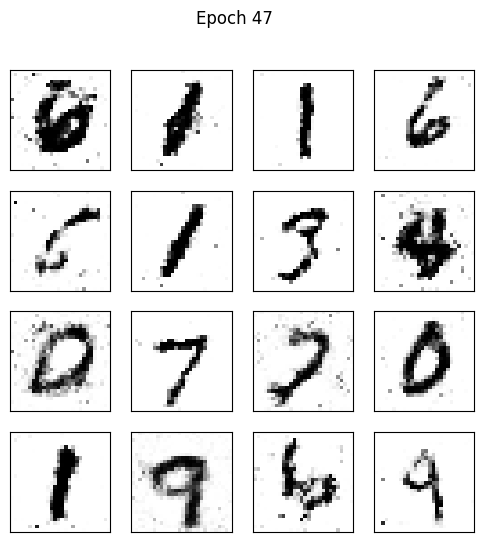

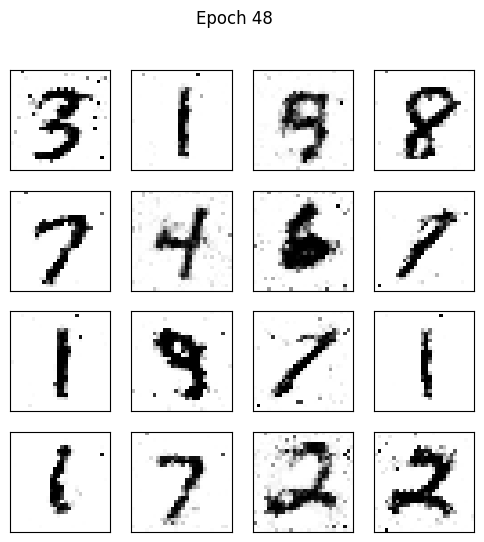

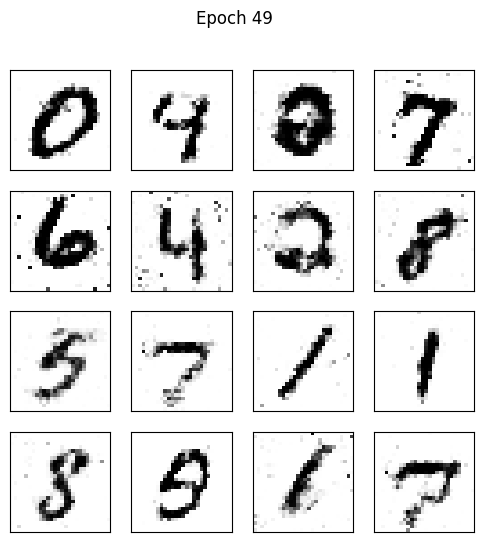

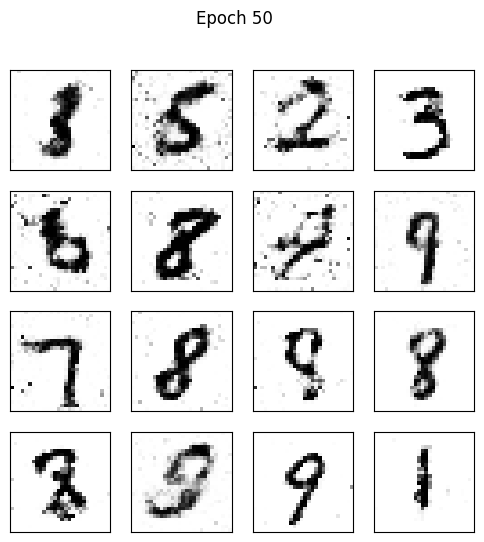

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

# Set the manual seed for reproducibility
torch.manual_seed(111)

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define transformations for MNIST dataset (normalize and convert to tensor)
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

# Download and load the MNIST training dataset
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

# Discriminator class definition
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1), nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        return self.model(x)

# Generator class definition
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256), nn.ReLU(),
            nn.Linear(256, 512), nn.ReLU(),
            nn.Linear(512, 1024), nn.ReLU(),
            nn.Linear(1024, 784), nn.Tanh(),
        )

    def forward(self, x):
        return self.model(x).view(x.size(0), 1, 28, 28)

# Initialize models
discriminator = Discriminator().to(device)
generator = Generator().to(device)

# Hyperparameters
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

# Optimizers
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

# Training the GAN
for epoch in range(num_epochs):
    for real_samples, _ in train_loader:
        real_samples = real_samples.to(device)
        real_samples_labels = torch.ones((real_samples.size(0), 1)).to(device)

        # Generate random latent space samples
        latent_space_samples = torch.randn((real_samples.size(0), 100)).to(device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((real_samples.size(0), 1)).to(device)

        # Train discriminator
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Train generator
        latent_space_samples = torch.randn((real_samples.size(0), 100)).to(device)
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

    # Display generated images after each epoch
    latent_space_samples = torch.randn(16, 100).to(device)
    generated_samples = generator(latent_space_samples).cpu().detach()
    plt.figure(figsize=(6, 6))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])
    plt.suptitle(f"Epoch {epoch+1}")
    plt.show()